In [1]:
import glob

import laspy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file_paths = glob.glob("../../data/interim/trees/*.las")
file_paths.sort()

data = pd.DataFrame({"path": file_paths})
data["species"] = data["path"].map(
    lambda p: p.split("/")[-1].split("_")[0].capitalize()
)

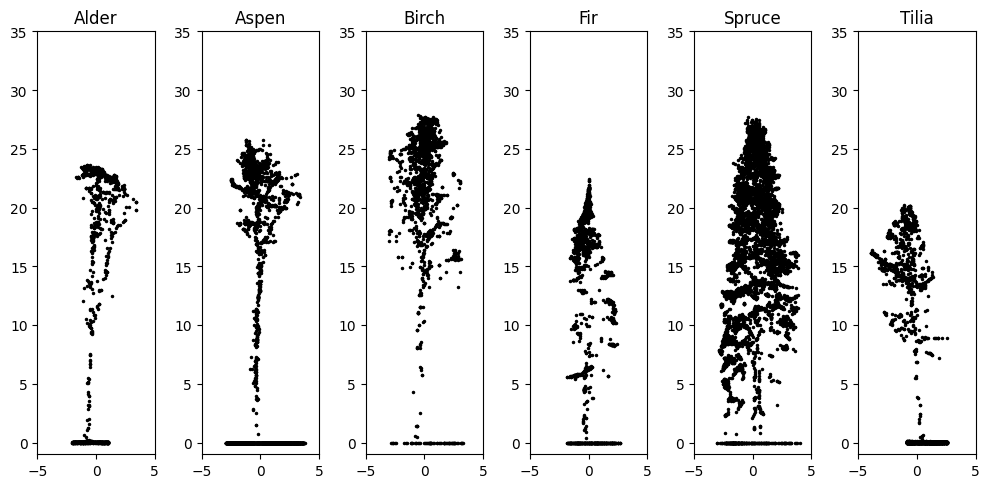

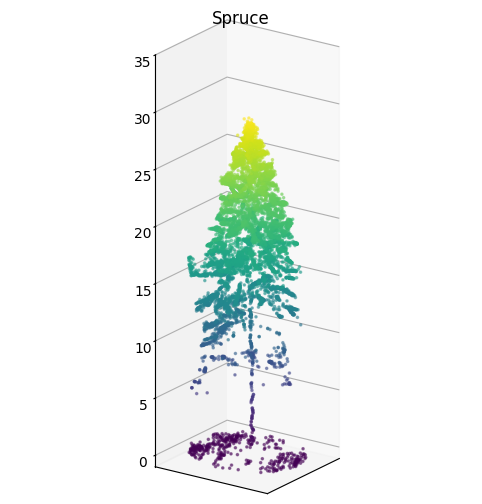

In [3]:
#| include: true
#| label: fig-individual-trees-visualization
#| layout: [[2.5, 1]]
#| fig-cap: "Visualizations of the individual tree point clouds in the dataset. Most of the tree clouds are top-heavy because of the observation from above, and some are artificially tilted because of slight terrain slopes and height normalization. The ground points are present."
#| fig-subcap:
#|  - "Cross-sections of random trees of every species (ignoring the Y dimension)."
#|  - "A spruce in 3D."

rng = np.random.default_rng(seed=331)

unique_species = data["species"].unique()

fig, axes = plt.subplots(1, len(unique_species), figsize=(10, 7), tight_layout=True)

for ax, species in zip(axes, unique_species):
    sample = (
        data[data["species"] == species]
        .sample(n=1, random_state=rng)
        .reset_index(drop=True)
    )
    las = laspy.read(sample.loc[0, "path"])
    X, Y, Z = np.rollaxis(las.xyz, axis=1)  # (N, dim) -> (dim, N)
    ax.plot(X - X.mean(), Z, marker=".", linestyle="", markersize=3, color="k")
    ax.set_aspect("equal")
    ax.set_title(sample.loc[0, "species"])
    ax.set_ylim(-1, 35)
    ax.set_xlim(-5, 5)


fig = plt.figure(figsize=(10, 6))

spruce = data.query("species == 'Spruce'")
sample = spruce.sample(n=1, random_state=150).reset_index(drop=True)
las = laspy.read(sample.loc[0, "path"])
X, Y, Z = np.rollaxis(las.xyz, axis=1)

ax = fig.add_subplot(projection="3d")
ax.scatter(
    X - X.mean(),
    Y - Y.mean(),
    Z,
    s=10,
    c=Z,
    marker=".",
    alpha=0.5,
    cmap="viridis",
)
ax.set_proj_type("ortho")
ax.set_aspect("equal")
ax.view_init(elev=20, azim=35, roll=0)
ax.set_title(sample.loc[0, "species"])
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-1, 35)
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())